# Preliminary Exploratory Data Analysis of Tracts and Listings
This notebook contains brief visual analysis of tracts and listings. The charts from this notebook were used for the mid-term presentation regarding tracts and listings. 

In [34]:
import os
import pandas as pd
import geopandas as gpd
import folium
from listings_and_tracts import merge_listings_and_tracts, read_tracts_parquet
import seaborn as sns
import matplotlib.pyplot as plt

Reading the listings and tracts data. Notice that we use a functino from the listings_and_tracts script to merge and read the listings and tracts into a single dataframe. The tracts_gdf simply reads the tracts parquet file.

In [20]:
listings_gdf = merge_listings_and_tracts()
tracts_gdf = read_tracts_parquet()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   statefp     242 non-null    object  
 1   countyfp    242 non-null    object  
 2   tractce     242 non-null    object  
 3   geoid       242 non-null    object  
 4   tract_name  242 non-null    object  
 5   namelsad    242 non-null    object  
 6   mtfcc       242 non-null    object  
 7   funcstat    242 non-null    object  
 8   aland       242 non-null    int64   
 9   awater      242 non-null    int64   
 10  intptlat    242 non-null    object  
 11  intptlon    242 non-null    object  
 12  geometry    242 non-null    geometry
 13  latitude    242 non-null    float64 
 14  area        242 non-null    float64 
dtypes: float64(2), geometry(1), int64(2), object(10)
memory usage: 28.5+ KB


In [26]:
def plot_map(listings_gdf: gpd.GeoDataFrame, tracts_gdf: gpd.GeoDataFrame, save: bool = False):
    '''
    Plot map of listings and tracts
    :param listings_gdf: 
    :param tracts_gdf: 
    :param save: 
    :return: 
    '''
    centroid_lat = listings_gdf.latitude.mean()
    centroid_lon = listings_gdf.longitude.mean()
    map_centroid = [centroid_lat, centroid_lon]
    map_ = folium.Map(location=map_centroid, zoom_start=12)
    
    # plotting tracts
    for _, r in tracts_gdf.iterrows():
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        
        
        
        geo_j = folium.GeoJson(
            data=geo_j,
            style_function=lambda x: {'color': 'darkblue',
                                      'weight': 1,

                                     }
                                      )
        
        folium.Tooltip('Tract: '+str(r['tract_name'])).add_to(geo_j)
        geo_j.add_to(map_)
    
    # plot listings
    for _, r in listings_gdf.iterrows():
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        
        geo_j = folium.GeoJson(
            data=geo_j,
            style_function=lambda x: {'color': 'darkred',
                                      'weight': 1,

                                     }
                                      )
        
        folium.Tooltip('Price: '+str(r['price'])).add_to(geo_j)
        geo_j.add_to(map_)
        
    if save:
        os.makedirs('plots', exist_ok=True)
        map_.save('plots/listings.html')
    
    
    return map_
plot_map(listings_gdf=listings_gdf, tracts_gdf=tracts_gdf, save=False)    

In [29]:
listings_gdf.shape

(1498, 44)

In [32]:
listings_gdf.id.unique().shape

(1498,)

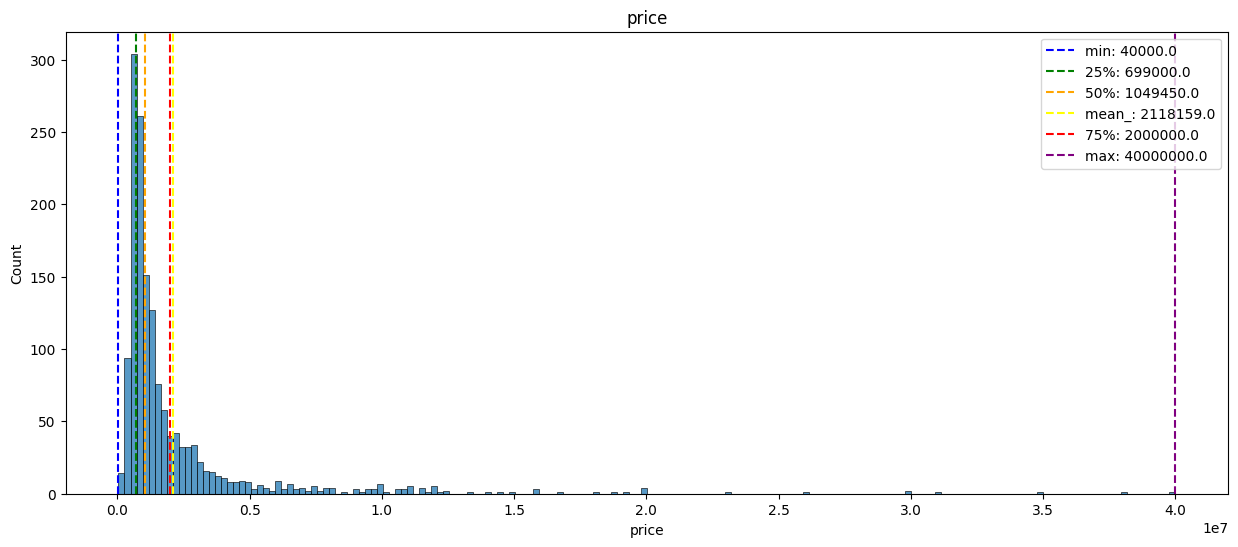

In [57]:
def plot_histogram(data: pd.DataFrame, col: str, save: bool = False):
    '''
    Plot histogram
    :param data: pandas dataframe
    :param col: string name of column
    :param save: if true, then the plot gets saved as a png file.
    :return: 
    '''
    df = data.copy()
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 6))
    sns.histplot(data=df, x=col, ax=ax)
    ax.set_title(col)
    stats = df[col].describe().round(0)
    min_ = stats['min']
    q25 = stats['25%']
    q75 = stats['75%']
    median_ = stats['50%']
    max_ = stats['max']
    mean_ = stats['mean']
    ax.axvline(min_, label=f'min: {min_}', color='b', linestyle='--')
    ax.axvline(q25, label=f'25%: {q25}', color='g', linestyle='--')
    ax.axvline(median_, label=f'50%: {median_}', color='orange', linestyle='--')
    ax.axvline(mean_, label=f'mean_: {mean_}', color='yellow', linestyle='--')
    ax.axvline(q75, label=f'75%: {q75}', color='red', linestyle='--')
    ax.axvline(max_, label=f'max: {max_}', color='purple', linestyle='--')
    ax.legend(loc='upper right')
    if save:
        os.makedirs('plots', exist_ok=True)
        plt.savefig(f'plots/histogram_{col}.png')
    plt.show()
    
    
    
plot_histogram(data=listings_gdf, col='price', save=True)
    

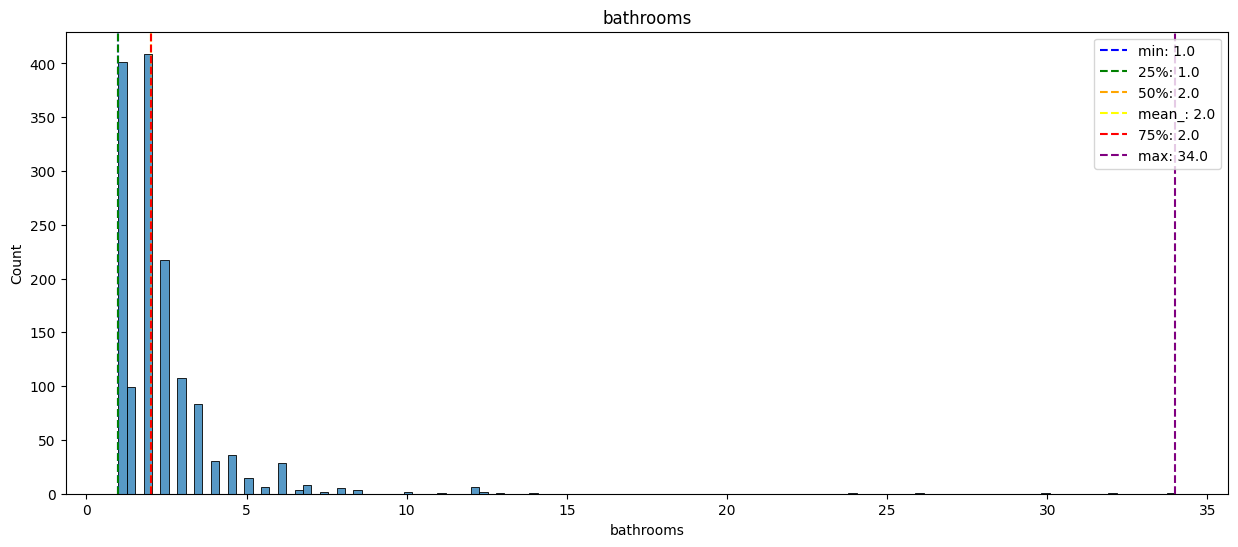

In [61]:
plot_histogram(data=listings_gdf, col='bathrooms', save=True)

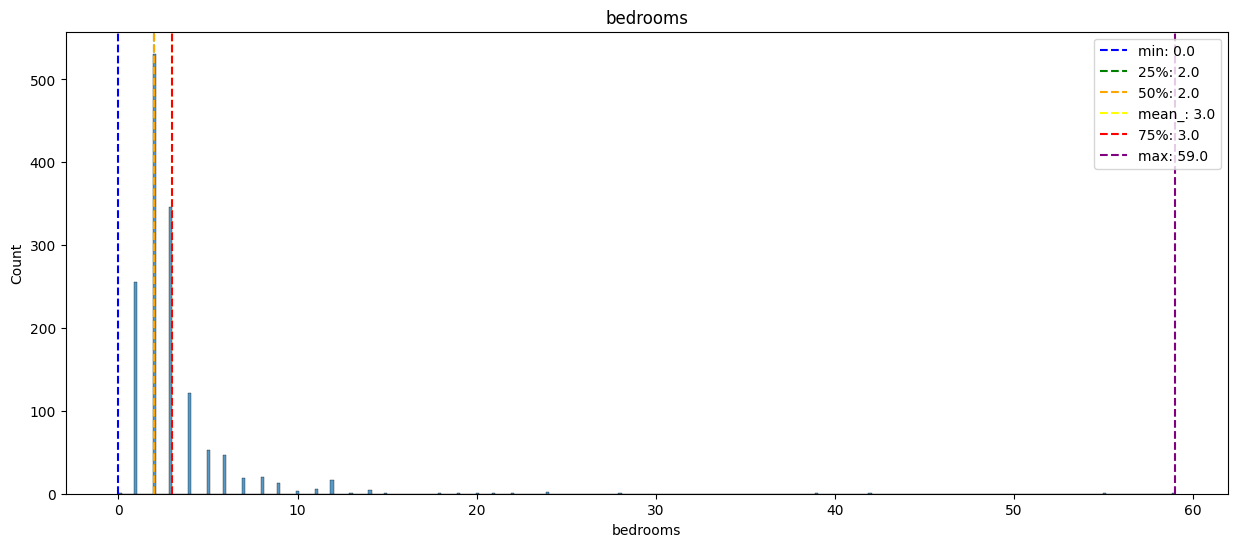

In [62]:
plot_histogram(data=listings_gdf, col='bedrooms', save=True)

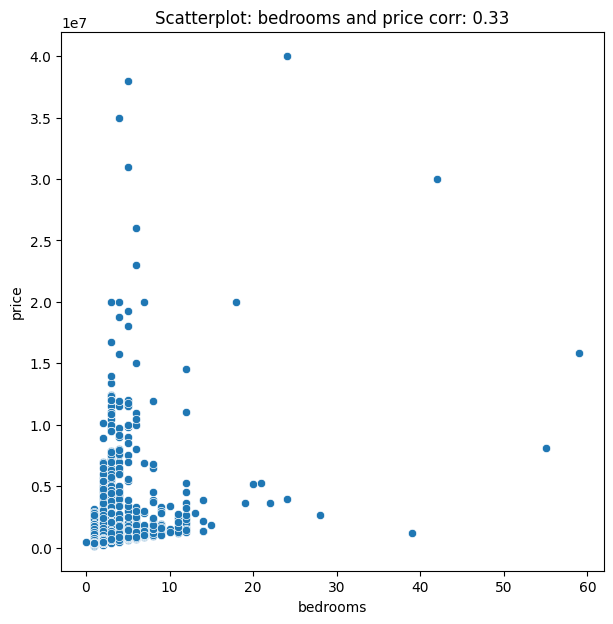

In [71]:
def plot_scatter(
        data:pd.DataFrame,
        x: str,
        y: str,
        save: bool = False
):
    df = data[[x, y]].copy()
    corr_ = df.corr()
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))
    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        ax=ax
        
    )
    ax.set_title(f'Scatterplot: {x} and {y} corr: {round(corr_[x].iloc[1], 2)}')
    if save:
        os.makedirs('plots', exist_ok=True)
        plt.savefig(f'plots/scatter_{x}_{y}.png')
    plt.show()

plot_scatter(data=listings_gdf, x='bedrooms', y='price', save=True)
    

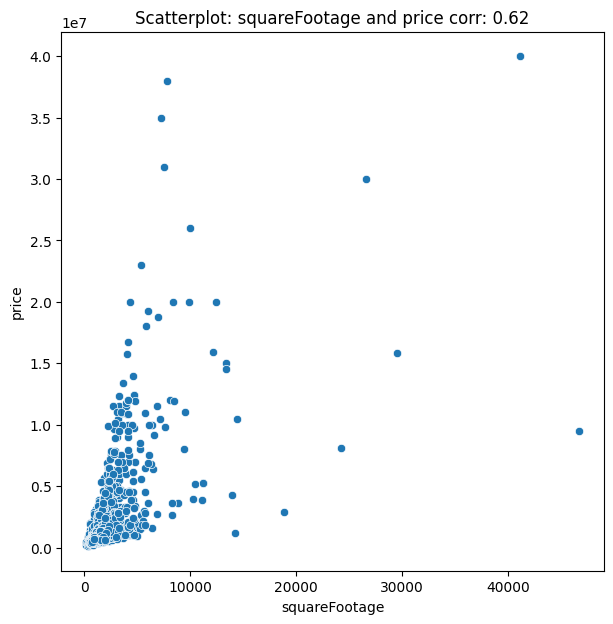

In [72]:
plot_scatter(data=listings_gdf, x='squareFootage', y='price', save=True)

In [73]:
listings_gdf.shape

(1498, 44)

In [74]:
listings_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1498 entries, 0 to 1663
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                1498 non-null   object             
 1   formattedAddress  1498 non-null   object             
 2   addressLine1      1498 non-null   object             
 3   addressLine2      1121 non-null   object             
 4   city              1498 non-null   object             
 5   state             1498 non-null   object             
 6   zipCode           1498 non-null   object             
 7   county            1498 non-null   object             
 8   latitude          1498 non-null   float64            
 9   longitude         1498 non-null   float64            
 10  propertyType      1498 non-null   object             
 11  bedrooms          1450 non-null   float64            
 12  bathrooms         1472 non-null   float64            
 13  

There are 171 unique tracts in the data.

In [76]:
len(listings_gdf.tract_name.unique().tolist())

171